In [ ]:
!pip install d2l==0.14
!pip install git+https://github.com/d2l-ai/d2l-zh@release 

In [4]:
import torch
from torch import nn
from d2l import torch as d2l

net=nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,padding=1),nn.Flatten(),
    nn.Linear(9600,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,10)
)

构建一个单通道数据，来观察每一层输出的形状

In [5]:
X=torch.rand(size=(1,1,244,244),dtype=torch.float32)
for layer in net:
  X=layer(X)
  print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 96, 59, 59])
ReLU output shape: 	 torch.Size([1, 96, 59, 59])
MaxPool2d output shape: 	 torch.Size([1, 96, 29, 29])
Conv2d output shape: 	 torch.Size([1, 256, 29, 29])
ReLU output shape: 	 torch.Size([1, 256, 29, 29])
MaxPool2d output shape: 	 torch.Size([1, 256, 14, 14])
Conv2d output shape: 	 torch.Size([1, 384, 14, 14])
ReLU output shape: 	 torch.Size([1, 384, 14, 14])
Conv2d output shape: 	 torch.Size([1, 384, 14, 14])
ReLU output shape: 	 torch.Size([1, 384, 14, 14])
Conv2d output shape: 	 torch.Size([1, 384, 14, 14])
ReLU output shape: 	 torch.Size([1, 384, 14, 14])
MaxPool2d output shape: 	 torch.Size([1, 384, 5, 5])
Flatten output shape: 	 torch.Size([1, 9600])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output sh

Fashion-MNIST图像的分辨率低于ImageNet图像。我们将它们增加到244*244

In [6]:
batch_size=128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=244)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

训练AlexNet

loss 0.323, train acc 0.882, test acc 0.887
376.1 examples/sec on cuda:0


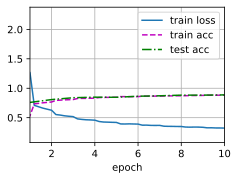

In [7]:
lr,num_epochs=0.01,10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())